<a href="https://colab.research.google.com/github/ElanDeyan/a3-cg-rv/blob/main/A3_CG_E_RV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 da UC de computação gráfica e realidade virtual

## Tema do projeto

Com base no conteúdo da UC Computação Gráfica e Realidade Virtual,  desenvolver um sistema ou programa que utilize algumas das técnicas englobadas pela UC.

Reconhecimento de formas: usar técnicas de PDI e CG e reconhecimento de padrões para identificar objetos em imagens.

## Especificação enviada ao professor no formulário

***Product Counter* - Reconhecimento de formas**

*Uma solução para contar a quantidade de objetos numa esteira, dada uma imagem com uma visão perpendicular à esteira.*


## Objetivos específicos

* Apresentar uma solução de um problema de computação gráfica na forma de um sistema de programação.
* Elaborar um relatório final apresentando os tópicos geradores teóricos para desenvolver a aplicação e o código desenvolvido.
* Depositar todo o material e desenvolvimento do código do projeto no GitHub.

## Cronograma

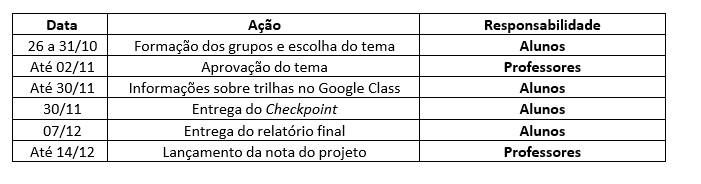

## Critérios de Avaliação

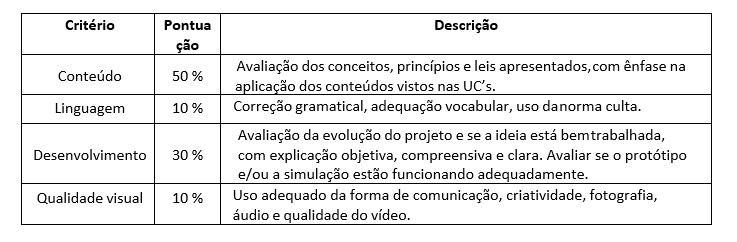

## Sobre o relatório final

O relatório final, link do GitHub e certificados das trilhas devem ser entregue
no GOOGLE CLASS na data estabelecida no cronograma abaixo.

O relatório final deve seguir a estrutura:

Relatório Final (estrutura básica): Introdução; Projeto; Resultados; Conclusão.
[Link do Google Class](https://classroom.google.com/c/NjM0Mjc3NzQzMzk2?cjc=jkfwxr5)

In [ ]:
# https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html
# Ver https://amin-ahmadi.com/cascade-trainer-gui/ pra gerar XML
# Uma ideia pode ser treinar ele pra reconhecer quando tem e quando não tem objetos, quaisquer que sejam
# Tipo, treinar imagem que tem diferentes objetos em quantidades diferentes e imagens sem nada

In [ ]:
# https://docs.opencv.org/4.x/d1/dc5/tutorial_background_subtraction.html
# https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html
# https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html
# https://docs.opencv.org/4.x/d8/d83/tutorial_py_grabcut.html
# https://docs.opencv.org/4.x/da/ddc/tutorial_generalized_hough_ballard_guil.html

In [ ]:
# https://dev.to/stokry/how-to-count-objects-on-an-image-with-python-142h

In [ ]:
# Usar IA

In [113]:
import cv2
from matplotlib import pyplot as plota
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [112]:
image = cv2.imread('./images.jpeg')

In [114]:
# Verificar se a imagem foi carregada corretamente
if image is not None:
    # Exibir a imagem (isso abrirá uma janela com a imagem)
    Altura, Largura, Canal = image.shape
    print(f"Largura: {Largura}, Altura: {Altura}, Canais: {Canal}")
else:
    print("A imagem não pôde ser carregada.")

Largura: 270, Altura: 148, Canais: 3


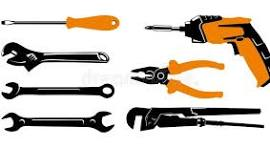

In [115]:
cv2_imshow(image)

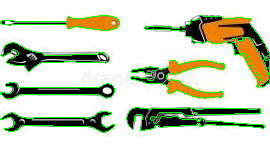

Número de objetos encontrados: 7


In [116]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

threshold = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 2)

kernel = np.ones((3, 3), np.uint8)
closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 250]

for contour in filtered_contours:
    cv2.drawContours(image, [contour], -1, (0, 255, 0), 1)

object_count = len(filtered_contours)

cv2_imshow(image)
print(f'Número de objetos encontrados: {object_count}')


In [ ]:
import cv2
import tensorflow as tf

model = tf.saved_model.load('ssd_mobilenet_v1_coco_2017_11_17/saved_model')

OSError: ignored

In [ ]:
mask = np.zeros(image.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(image,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
image = image*mask2[:,:,np.newaxis]

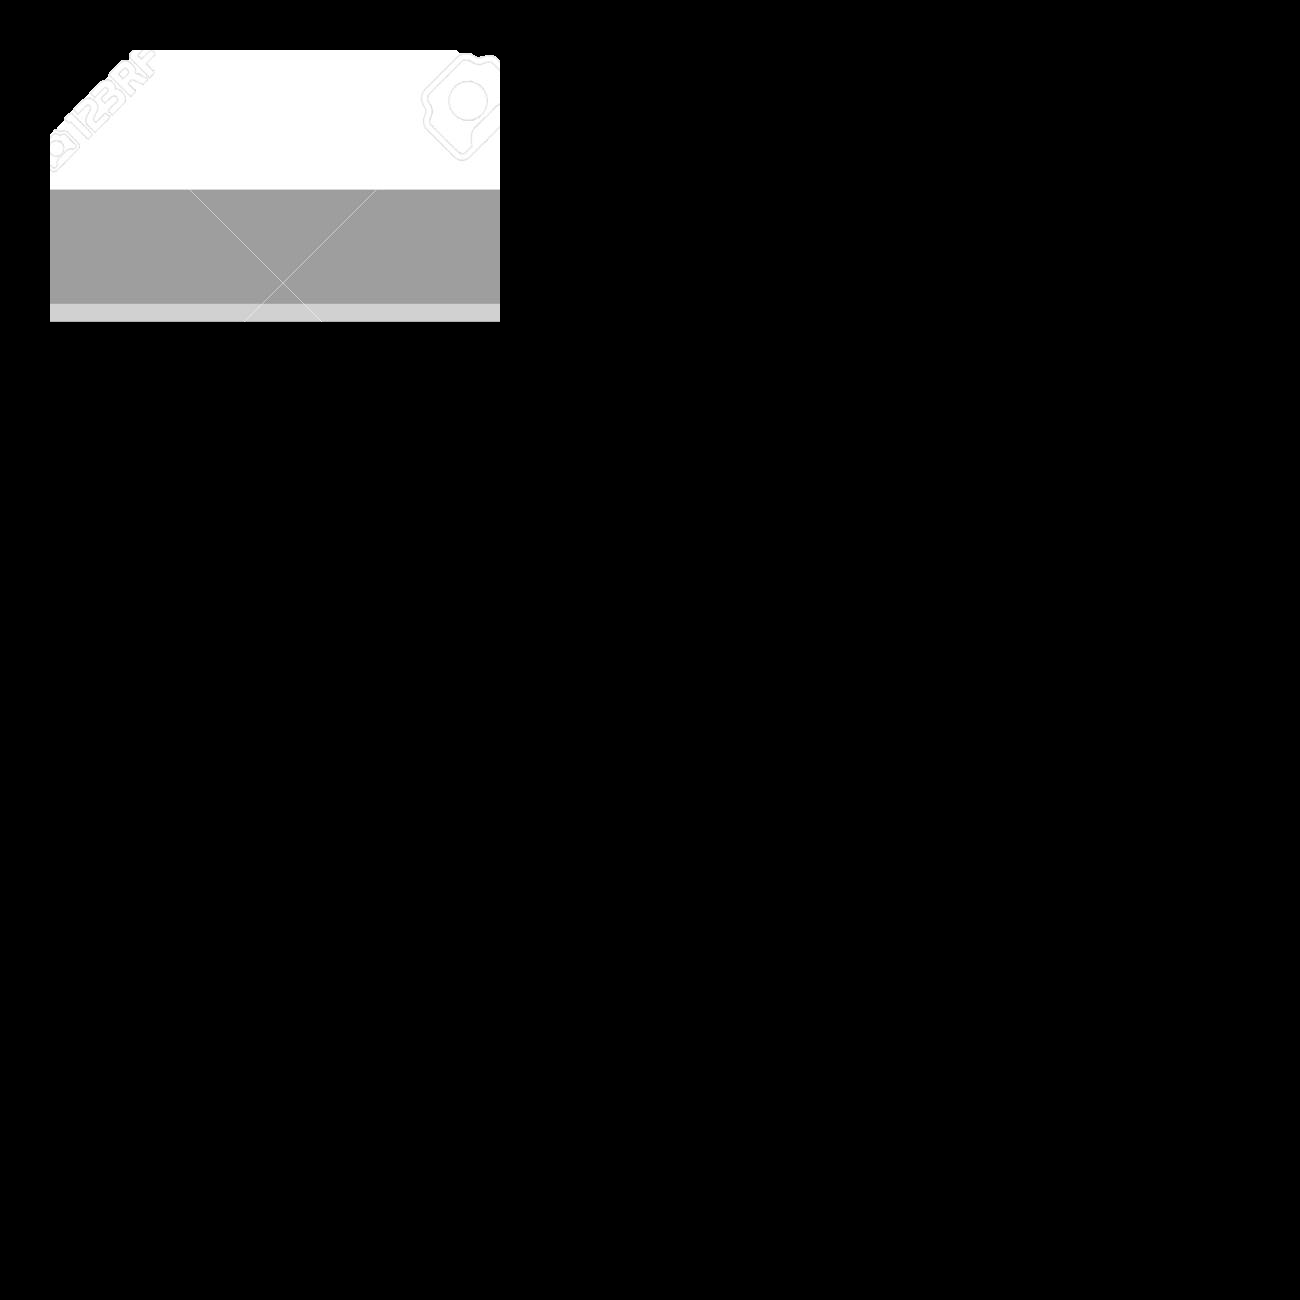

In [ ]:
cv2_imshow(image)

In [ ]:
### CÓDIGO ALTERNATIVO QUE ESTÁ PINTANDO AS IMAGENS PODENDO SER PEQUENAS OU GRANDES NA FOTO

In [ ]:
!pip install pillow
from google.colab import files
from PIL import Image

In [ ]:


uploaded = files.upload()

# Obter o nome do arquivo da imagem
file_name = list(uploaded.keys())[0]

# Carregar a imagem usando a biblioteca PIL
image_pil = Image.open(file_name)

# Converter a imagem PIL para uma imagem NumPy (OpenCV)
original_image = np.array(image_pil)

# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Aplicar um desfoque para ajudar na detecção de contornos
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Detecção de contornos usando Canny com limiares ajustados
edges = cv2.Canny(blurred_image, 30, 100)

# Encontrar contornos na imagem com tamanho mínimo ajustado
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Criar uma cópia da imagem original para desenhar os contornos
marked_image = original_image.copy()

# Loop pelos contornos e desenhar contornos ao redor dos objetos grandes
for contour in contours:
    # Calcular a área do contorno
    area = cv2.contourArea(contour)

    # Ajustar o limite da área para filtrar contornos pequenos (ajuste conforme necessário)
    if area > 2000:
        # Obter um retângulo delimitador ao redor do contorno
        x, y, w, h = cv2.boundingRect(contour)

        # Desenhar um retângulo ao redor do objeto
        cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Converter a imagem marcada para RGB (se necessário)
marked_image_rgb = cv2.cvtColor(marked_image, cv2.COLOR_BGR2RGB)

# Exibir a imagem original e a imagem marcada
Image.fromarray(np.hstack([original_image, marked_image_rgb]))

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle (1).json" with length 72 bytes


In [ ]:
!kaggle datasets download "salmaneunus/mechanical-tools-dataset"

 98% 640M/652M [00:07<00:00, 115MB/s] 
100% 652M/652M [00:07<00:00, 86.1MB/s]


In [ ]:
!unzip mechanical-tools-dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: train_data/train_data/Wrench/000546.jpg  
  inflating: train_data/train_data/Wrench/000547.jpg  
  inflating: train_data/train_data/Wrench/000548.jpg  
  inflating: train_data/train_data/Wrench/000549.jpg  
  inflating: train_data/train_data/Wrench/000550.jpg  
  inflating: train_data/train_data/Wrench/000551.jpg  
  inflating: train_data/train_data/Wrench/000557.jpg  
  inflating: train_data/train_data/Wrench/000558.jpg  
  inflating: train_data/train_data/Wrench/000559.jpg  
  inflating: train_data/train_data/Wrench/000560.jpg  
  inflating: train_data/train_data/Wrench/000561.jpg  
  inflating: train_data/train_data/Wrench/000562.jpg  
  inflating: train_data/train_data/Wrench/000563.jpg  
  inflating: train_data/train_data/Wrench/000564.jpg  
  inflating: train_data/train_data/Wrench/000565.jpg  
  inflating: train_data/train_data/Wrench/000568.jpg  
  inflating: train_data/train_data/Wrench/000569.jpg  
  infl